Author: Vaasudevan Srinivasan <br>
Created on: June 27, 2021

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from tqdm.keras import TqdmCallback
from tensorflow.keras.utils import plot_model
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

tf.__version__

'2.5.0'

# Creating sample regression data (so we can model it)

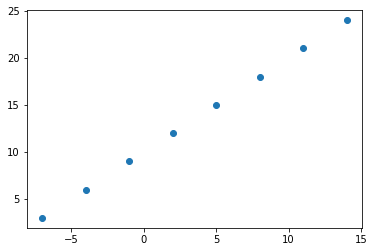

In [ ]:
x = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(x, y);

In [ ]:
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

# The major steps in modelling with TensorFlow

In [ ]:
tf_x = tf.constant(x)
tf_y = tf.constant(y)

In [ ]:
tf.random.set_seed(96)

# Build
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Fit
H = model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 244ms/step - loss: 14.7721 - mae: 14.7721
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 14.6396 - mae: 14.6396
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 14.5071 - mae: 14.5071
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 14.3746 - mae: 14.3746
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 14.2421 - mae: 14.2421


In [ ]:
model.predict([17.0])

array([[-3.1538944]], dtype=float32)

# Steps in improving a model with TensorFlow part 1, part 2 and part 3

In [ ]:
tf.random.set_seed(96)

# Build
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# Fit
H = model.fit(x, y, epochs=100, callbacks=[TqdmCallback(verbose=0)],
              verbose=0)

In [ ]:
model.predict([17.0])

array([[27.196081]], dtype=float32)

# Evaluating a TensorFlow model part 1 to part 6 (visualise, visualise, visualise)

In [ ]:
x = tf.range(-100, 100, 4)
y = x + 10

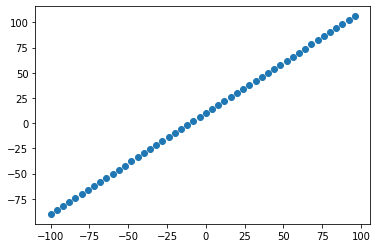

In [ ]:
plt.scatter(x, y);

In [ ]:
x_train, y_train = x[:40], y[:40]
x_test, y_test = x[40:], y[40:]

print(x_train.shape, x_test.shape)

(40,) (10,)


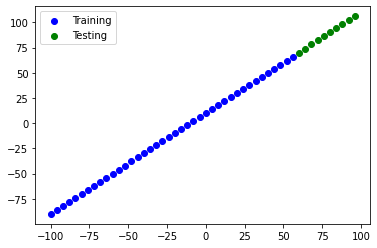

In [ ]:
plt.scatter(x_train, y_train, c='b', label='Training')
plt.scatter(x_test, y_test, c='g', label='Testing')
plt.legend();

In [ ]:
# Build
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,), name='Input'),
    tf.keras.layers.Dense(1, name='Output')
], name='RegressionModel')

# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=['mae'])

# Fit
H = model.fit(x_train, y_train, epochs=100, callbacks=[TqdmCallback(verbose=0)],
              verbose=0)

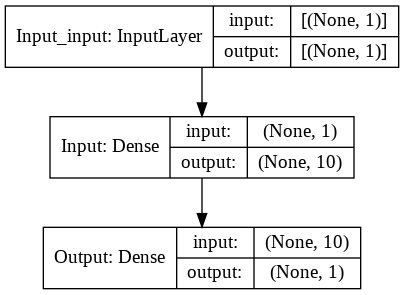

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([[ 69.44408 ],
       [ 73.39457 ],
       [ 77.345055],
       [ 81.29555 ],
       [ 85.24603 ],
       [ 89.196526],
       [ 93.147   ],
       [ 97.09748 ],
       [101.04798 ],
       [104.99846 ]], dtype=float32)

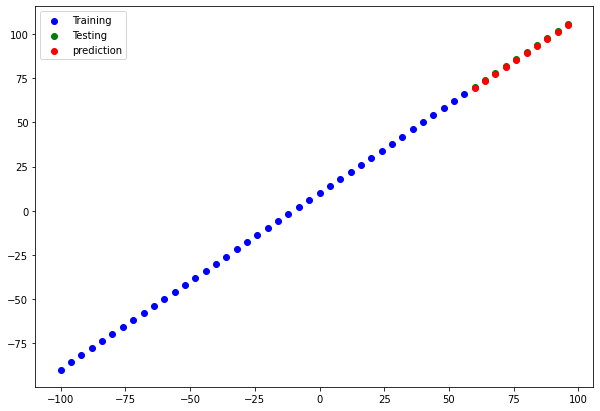

In [ ]:
def plot_predictions(x_train, y_train, x_test, y_test, y_pred):
    plt.figure(figsize=(10, 7))
    plt.scatter(x_train, y_train, c='b', label='Training')
    plt.scatter(x_test, y_test, c='g', label='Testing')
    plt.scatter(x_test, y_pred, c='r', label='prediction')
    plt.legend();

plot_predictions(x_train, y_train, x_test, y_test, y_pred)

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 133ms/step - loss: 0.7787 - mae: 0.7787


[0.7787254452705383, 0.7787254452705383]

# How to save and load a TensorFlow model

In [ ]:
model.save('mymodel.h5')

In [ ]:
loaded_model = tf.keras.models.load_model('mymodel.h5')

# Preprocessing data with feature scaling (normalizing our data)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

df_x = df.drop('charges', axis=1)
df_y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3)

x_train_normal = ct.fit_transform(x_train)
x_test_normal = ct.fit_transform(x_test)

print(type(x_train_normal), x_train_normal.shape)

<class 'numpy.ndarray'> (936, 11)
